<a href="https://colab.research.google.com/github/Afsoon-Ghazanfari/Salary-Predictor/blob/merve/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [8]:
!ls /content/drive/MyDrive/RediSchool-salarypredictor/

SalarPredictorTasks.gdoc  survey_results_public.csv  survey_results_public_modified.csv


In [9]:
df = pd.read_csv('/content/drive/My Drive/RediSchool-salarypredictor/survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [10]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [11]:
df=df[df.Country=='Germany']

In [16]:
len(df)

7328

In [18]:
df.to_csv('/content/drive/My Drive/RediSchool-salarypredictor/survey_results_germany.csv')

In [19]:
#df_new=df[['MainBranch','Employment','RemoteWork','YearsCodePro','DevType','OrgSize','CompTotal','Country']]
df_new=df[['RemoteWork','YearsCodePro','Employment','DevType','Country','CompTotal']]

In [20]:
df_new.head()

,RemoteWork,YearsCodePro,Employment,DevType,Country,CompTotal
15,"Hybrid (some remote, some in-person)",10,"Employed, full-time","Developer, back-end",Germany,100000.0
19,"Hybrid (some remote, some in-person)",14,"Employed, full-time","Developer, full-stack",Germany,70044.0
21,Remote,5,"Employed, full-time",Data scientist or machine learning specialist,Germany,80000.0
23,Remote,10,"Employed, full-time",Data or business analyst,Germany,65000.0
32,"Hybrid (some remote, some in-person)",7,"Employed, full-time","Developer, back-end",Germany,50000.0


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7328 entries, 15 to 89146
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RemoteWork    6234 non-null   object 
 1   YearsCodePro  5355 non-null   object 
 2   Employment    7321 non-null   object 
 3   DevType       6328 non-null   object 
 4   Country       7328 non-null   object 
 5   CompTotal     3981 non-null   float64
dtypes: float64(1), object(5)
memory usage: 400.8+ KB


In [22]:
# count the number of missing data and then proceed
missing_data = df_new.isnull()
print("Below Results shows there are no missing data in first 5 samples (or rows) ")
display(missing_data.head())

Below Results shows there are no missing data in first 5 samples (or rows) 


,RemoteWork,YearsCodePro,Employment,DevType,Country,CompTotal
15,False,False,False,False,False,False
19,False,False,False,False,False,False
21,False,False,False,False,False,False
23,False,False,False,False,False,False
32,False,False,False,False,False,False


In [23]:
for column in missing_data.columns.values.tolist():
    print(column)
    display(missing_data[column].value_counts())
    print("")

RemoteWork


False    6234
True     1094
Name: RemoteWork, dtype: int64


YearsCodePro


False    5355
True     1973
Name: YearsCodePro, dtype: int64


Employment


False    7321
True        7
Name: Employment, dtype: int64


DevType


False    6328
True     1000
Name: DevType, dtype: int64


Country


False    7328
Name: Country, dtype: int64


CompTotal


False    3981
True     3347
Name: CompTotal, dtype: int64

In [25]:
#create a box plot
import plotly.express as px

fig = px.box(df_new, y='CompTotal')

fig.show()

In [26]:
df_new2=df_new[~df_new.CompTotal.isnull()]

In [27]:
IQR = df_new2['CompTotal'].quantile(0.75) - df_new2['CompTotal'].quantile(0.25)
IQR

35000.0

In [28]:
Higher_outlier = df_new2['CompTotal'].quantile(0.75) + (IQR * 1.5)
lower_outlier = df_new2['CompTotal'].quantile(0.25) - (IQR * 1.5)
print(Higher_outlier)
print(lower_outlier)

142500.0
2500.0


In [29]:
print("Higher")
print(df_new2.loc[df_new2['CompTotal'] >= Higher_outlier, 'CompTotal'])
print("Lower")
print(df_new2.loc[df_new2['CompTotal']<lower_outlier,'CompTotal'])


Higher
103      150000.0
539      190000.0
915      220000.0
1025     160000.0
2023     170000.0
           ...   
82357    143000.0
84582    204000.0
85407    250000.0
86242    300000.0
87383    150000.0
Name: CompTotal, Length: 180, dtype: float64
Lower
5029        0.0
10274     100.0
12274      70.0
18450      85.0
19875      71.0
21006     520.0
21978      30.0
22352      90.0
26478       0.0
28915       0.0
29205      38.0
30054       0.0
30065       0.0
33028       0.0
37766       0.0
40769       0.0
44606     130.0
45071       0.0
47819      65.0
48839      48.0
59750    2300.0
61770       0.0
64955       1.0
65231      70.0
65462     100.0
67446    2000.0
70225       0.0
74389      80.0
77233    1000.0
79306     800.0
89146    1500.0
Name: CompTotal, dtype: float64


In [30]:
df_new3=df_new2[df_new2['CompTotal'] <= Higher_outlier]
fig = px.box(df_new3, y='CompTotal')

fig.show()

In [31]:
len(df_new3)

3801

In [32]:
df_new4=df_new3[df_new3['CompTotal'] >= lower_outlier]
fig = px.box(df_new4, y='CompTotal')

fig.show()

In [40]:
# count the number of missing data and then proceed
missing_data = df_new4.isnull()
print("Below Results shows there are no missing data in first 5 samples (or rows) ")
display(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    display(missing_data[column].value_counts())
    print("")

Below Results shows there are no missing data in first 5 samples (or rows) 


,RemoteWork,YearsCodePro,Employment,DevType,Country,CompTotal
15,False,False,False,False,False,False
19,False,False,False,False,False,False
21,False,False,False,False,False,False
23,False,False,False,False,False,False
32,False,False,False,False,False,False


RemoteWork


False    3768
True        2
Name: RemoteWork, dtype: int64


YearsCodePro


False    3747
True       23
Name: YearsCodePro, dtype: int64


Employment


False    3770
Name: Employment, dtype: int64


DevType


False    3767
True        3
Name: DevType, dtype: int64


Country


False    3770
Name: Country, dtype: int64


CompTotal


False    3770
Name: CompTotal, dtype: int64

In [43]:
df_new4=df_new4.dropna()

In [44]:
df_new4['YearsCodePro']=df_new4['YearsCodePro'].replace('Less than 1 year',0)
df_new4['YearsCodePro']=df_new4['YearsCodePro'].replace('More than 50 years',51)
df_new4['YearsCodePro']=df_new4['YearsCodePro'].astype(int)

<ipython-input-44-e25a0e056cb0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-e25a0e056cb0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-e25a0e056cb0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
df_new4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744 entries, 15 to 89088
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RemoteWork    3744 non-null   object 
 1   YearsCodePro  3744 non-null   int64  
 2   Employment    3744 non-null   object 
 3   DevType       3744 non-null   object 
 4   Country       3744 non-null   object 
 5   CompTotal     3744 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 204.8+ KB


In [50]:
display(df_new4.duplicated().sum())

421

In [51]:
def remove_duplicate(df):
    print("\nDimension of dataset before removing duplicates: ", df.shape)
    df = df.drop_duplicates(keep='first')
    print("\nDimension of dataset after removing duplicates: ", df.shape)
    return df

df_new = remove_duplicate(df_new4)
display(df_new4.head())


Dimension of dataset before removing duplicates:  (3744, 6)

Dimension of dataset after removing duplicates:  (3323, 6)


,RemoteWork,YearsCodePro,Employment,DevType,Country,CompTotal
15,"Hybrid (some remote, some in-person)",10,"Employed, full-time","Developer, back-end",Germany,100000.0
19,"Hybrid (some remote, some in-person)",14,"Employed, full-time","Developer, full-stack",Germany,70044.0
21,Remote,5,"Employed, full-time",Data scientist or machine learning specialist,Germany,80000.0
23,Remote,10,"Employed, full-time",Data or business analyst,Germany,65000.0
32,"Hybrid (some remote, some in-person)",7,"Employed, full-time","Developer, back-end",Germany,50000.0


In [56]:
df_new4.Employment.unique()

array(['Employed, full-time', 'Employed, part-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'],
      dtype=object)

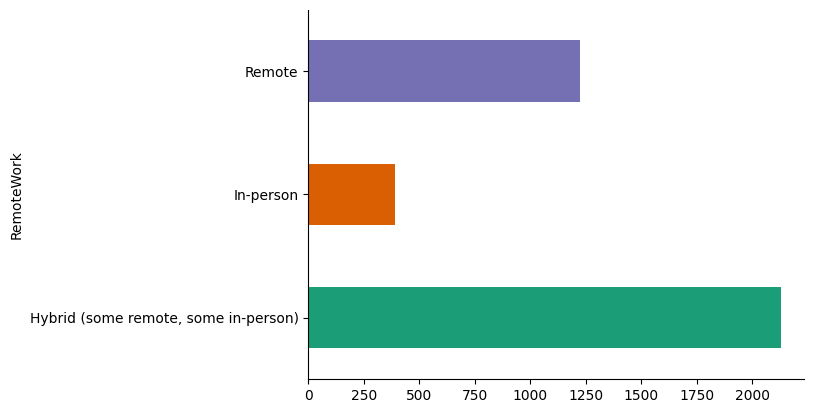

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
df_new4.groupby('RemoteWork').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [60]:
df_new4[['YearsCodePro','CompTotal']].describe()

,YearsCodePro,CompTotal
count,3744.000000,3744.000000
mean,10.402511,70915.430021
std,7.847811,24206.531474
min,0.000000,3000.000000
25%,5.000000,55000.000000
50%,8.000000,70000.000000
75%,14.000000,85000.000000
max,51.000000,141000.000000


In [62]:
data=df_new4[['YearsCodePro','CompTotal']]

In [63]:
data.CompTotal.max()

141000.0

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('CompTotal', axis=1), data['CompTotal'], test_size=0.33, random_state=42)

In [65]:
model = GradientBoostingRegressor(n_estimators=250,learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=250)

In [66]:
# Salary predictions
predict_salary = model.predict(X_test)
predict_df=pd.DataFrame(predict_salary,columns=['Predicted'])
predict_df['Actual']=y_test.values

In [67]:
predict_df['difference']=predict_df['Predicted']-predict_df['Actual']

In [68]:
predict_df

,Predicted,Actual,difference
0,66027.998394,82000.0,-15972.001606
1,71521.124471,55000.0,16521.124471
2,83742.255282,20000.0,63742.255282
3,91423.252427,75000.0,16423.252427
4,87223.432003,90000.0,-2776.567997
...,...,...,...
1231,66027.998394,20000.0,46027.998394
1232,90247.562099,60000.0,30247.562099
1233,84270.045559,120000.0,-35729.954441
1234,83742.255282,80000.0,3742.255282


In [ ]:
label_encoder = preprocessing.LabelEncoder()
data2=df_new[['MainBranch','YearsCodePro','CompTotal']]
data2['MainBranch']= label_encoder.fit_transform(data2['MainBranch'])


<ipython-input-185-0a06046509ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['MainBranch']= label_encoder.fit_transform(data2['MainBranch'])


In [ ]:
data2.MainBranch.unique()

array([1, 0])